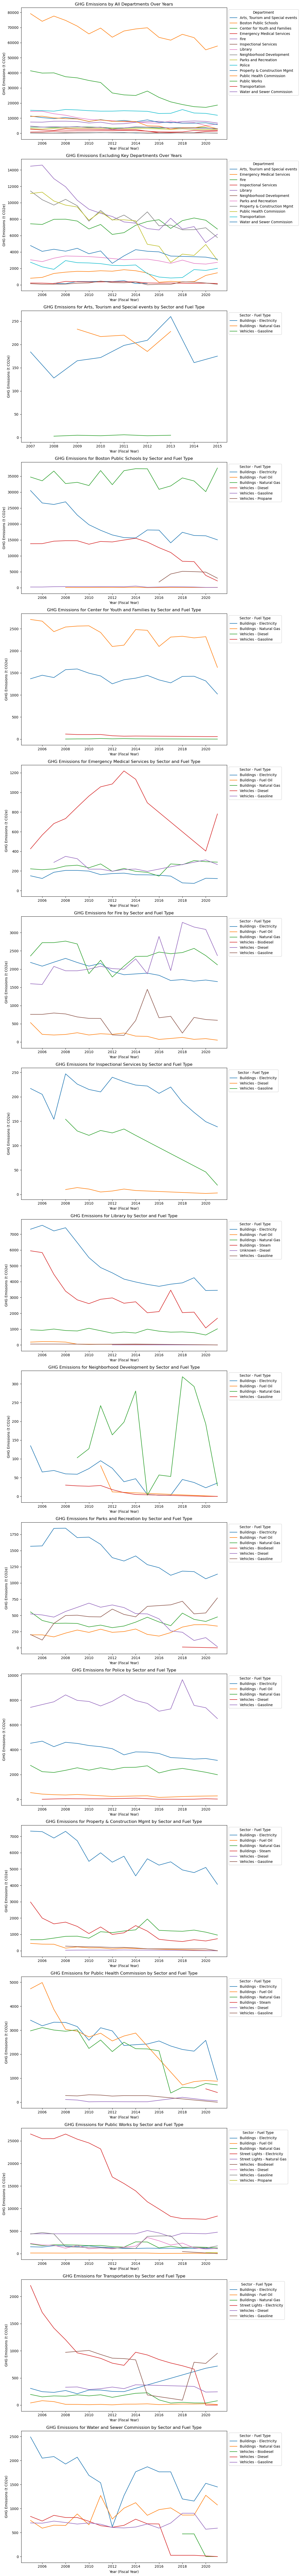

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
greenhouse_gas_df = pd.read_csv("data/rawData.csv")

# Filter out rows where 'GHG Emissions (t CO2e)' column has a hyphen "-"
# Convert 'GHG Emissions (t CO2e)' column to float after removing commas
greenhouse_gas_df = greenhouse_gas_df[greenhouse_gas_df['GHG Emissions (t CO2e)'] != "-"]
greenhouse_gas_df['GHG Emissions (t CO2e)'] = greenhouse_gas_df['GHG Emissions (t CO2e)'].str.replace(',', '').astype(float)

# Group the data by 'Department Longname', 'Sector', 'Fuel Type' and 'Year (Fiscal Year)' and sum GHG Emissions
ghg_per_dept_sector_fuel_year = greenhouse_gas_df.groupby(['Department Longname', 'Sector', 'Fuel Type', 'Year (Fiscal Year)'])['GHG Emissions (t CO2e)'].sum().reset_index()

# Exclude specific departments
excluded_departments = ['Boston Public Schools', 'Center for Youth and Families', 'Police', 'Public Works']
ghg_per_dept_year = greenhouse_gas_df.groupby(['Department Longname', 'Year (Fiscal Year)'])['GHG Emissions (t CO2e)'].sum().reset_index()
ghg_per_dept_year_filtered = ghg_per_dept_year[~ghg_per_dept_year['Department Longname'].isin(excluded_departments)]

# Setup the figure and axes for the department and sector/fuel type breakdown
fig, axs = plt.subplots(len(departments) + 2, 1, figsize=(12, 6 * (len(departments) + 2)), squeeze=False)

# Plot for all departments
for department in ghg_per_dept_year['Department Longname'].unique():
    dept_data = ghg_per_dept_year[ghg_per_dept_year['Department Longname'] == department]
    axs[0, 0].plot(dept_data['Year (Fiscal Year)'], dept_data['GHG Emissions (t CO2e)'], label=department)

axs[0, 0].set_title('GHG Emissions by All Departments Over Years')
axs[0, 0].set_xlabel('Year (Fiscal Year)')
axs[0, 0].set_ylabel('GHG Emissions (t CO2e)')
axs[0, 0].legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))

# Plot excluding specific departments
for department in ghg_per_dept_year_filtered['Department Longname'].unique():
    dept_data = ghg_per_dept_year_filtered[ghg_per_dept_year_filtered['Department Longname'] == department]
    axs[1, 0].plot(dept_data['Year (Fiscal Year)'], dept_data['GHG Emissions (t CO2e)'], label=department)

axs[1, 0].set_title('GHG Emissions Excluding Key Departments Over Years')
axs[1, 0].set_xlabel('Year (Fiscal Year)')
axs[1, 0].set_ylabel('GHG Emissions (t CO2e)')
axs[1, 0].legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))

# Plot for each department by Sector and Fuel Type
for i, department in enumerate(ghg_per_dept_sector_fuel_year['Department Longname'].unique(), start=2):
    dept_data = ghg_per_dept_sector_fuel_year[ghg_per_dept_sector_fuel_year['Department Longname'] == department]
    combinations = dept_data[['Sector', 'Fuel Type']].drop_duplicates()
    for _, combo in combinations.iterrows():
        combo_data = dept_data[(dept_data['Sector'] == combo['Sector']) & (dept_data['Fuel Type'] == combo['Fuel Type'])]
        axs[i, 0].plot(combo_data['Year (Fiscal Year)'], combo_data['GHG Emissions (t CO2e)'], label=f"{combo['Sector']} - {combo['Fuel Type']}")

    axs[i, 0].set_title(f'GHG Emissions for {department} by Sector and Fuel Type')
    axs[i, 0].set_xlabel('Year (Fiscal Year)')
    axs[i, 0].set_ylabel('GHG Emissions (t CO2e)')
    axs[i, 0].legend(title='Sector - Fuel Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()